In [35]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
from matplotlib import pyplot as plt
import numpy as np
import os
from math import *
import tensorflow as tf
import os, sys, tarfile, glob, shutil
import dill as pickle
import numpy as np
# Data loading and preprocessing
from tflearn.datasets import cifar10
(X, Y), (X_test, Y_test) = cifar10.load_data()
X, Y = shuffle(X, Y)


# nb_classes=10
# Y = to_categorical(Y,nb_classes=10)
# Y_test = to_categorical(Y_test,nb_classes=10)

In [121]:

aeroplanes_idx = np.where(Y ==0)
aeroplanes_idx = aeroplanes_idx[0][:100]
aero_images = X[aeroplanes_idx]
aero_labels = Y[aeroplanes_idx]



birds_idx = np.where(Y ==2)
birds_idx = birds_idx[0][:100]
birds_images = X[birds_idx]
birds_labels = Y[birds_idx]

cats_idx = np.where(Y ==3)
cats_idx = cats_idx[0][:100]
cats_images = X[cats_idx]
cats_labels = Y[cats_idx]


deer_idx = np.where(Y ==4)
deer_idx = deer_idx[0][:100]
deer_images = X[deer_idx]
deer_labels = Y[deer_idx]

dogs_idx = np.where(Y ==5)
dogs_idx = dogs_idx[0][:100]
dogs_images = X[dogs_idx]
dogs_labels = Y[dogs_idx]


train =  np.concatenate((aero_images, birds_images,cats_images,deer_images,dogs_images), axis=0)
train_labels =  np.concatenate((aero_labels, birds_labels,cats_labels,deer_labels,dogs_labels), axis=0)

# Generate random indices for creating test dataset
indices = [np.random.choice(range(50)) for i in range(10)]
dogs_idx = np.where(Y ==5)
indices = dogs_idx[0][indices]
dogs_images = X[indices]
dogs_labels = Y[indices]

indices = [np.random.choice(range(50)) for i in range(10)]
deer_idx = np.where(Y ==4)
indices = deer_idx[0][indices]
deer_images = X[indices]
deer_labels = Y[indices]

indices = [np.random.choice(range(50)) for i in range(10)]
cats_idx = np.where(Y ==3)
indices = cats_idx[0][indices]
cats_images = X[indices]
cats_labels = Y[indices]

indices = [np.random.choice(range(50)) for i in range(10)]
birds_idx = np.where(Y ==2)
indices = birds_idx[0][indices]
birds_images = X[indices]
birds_labels = Y[indices]

indices = [np.random.choice(range(50)) for i in range(10)]
aeroplanes_idx = np.where(Y ==0)
indices = aeroplanes_idx[0][indices]
aero_images = X[indices]
aero_labels = Y[indices]

test =  np.concatenate((aero_images, birds_images,cats_images,deer_images,dogs_images), axis=0)
test_labels =  np.concatenate((aero_labels, birds_labels,cats_labels,deer_labels,dogs_labels), axis=0)
print "Training Data set shape:", train.shape
print "Test Data set shape:", test.shape
import scipy
train_dict = {'train':train,'train_labels':train_labels}
test_dict = {'test':test,'test_labels':test_labels}


scipy.io.savemat("train.mat",train_dict)
scipy.io.savemat("test.mat",test_dict)


Training Data set shape: (500, 32, 32, 3)
Test Data set shape: (50, 32, 32, 3)


### Visualize Train and test Dataset


In [116]:
  #Visualizing CIFAR 10, takes indicides and shows in a grid
def cifar_grid(X,Y,inds,n_col, predictions=None):

    N = len(inds)
    n_row = int(ceil(1.0*N/n_col))
    fig, axes = plt.subplots(n_row,n_col,figsize=(10,10))
    clabels = labels["label_names"]

    for j in range(n_row):
        for k in range(n_col):
            i_inds = j*n_col+k
            i_data = inds[i_inds]
            axes[j][k].set_axis_off()
            if i_inds < N:
                axes[j][k].imshow(X[i_data,...], interpolation='nearest')
                label = clabels[Y[i_data]]
                axes[j][k].set_title(label)

             
    fig.set_tight_layout(True)
    return(fig)

### Training Data

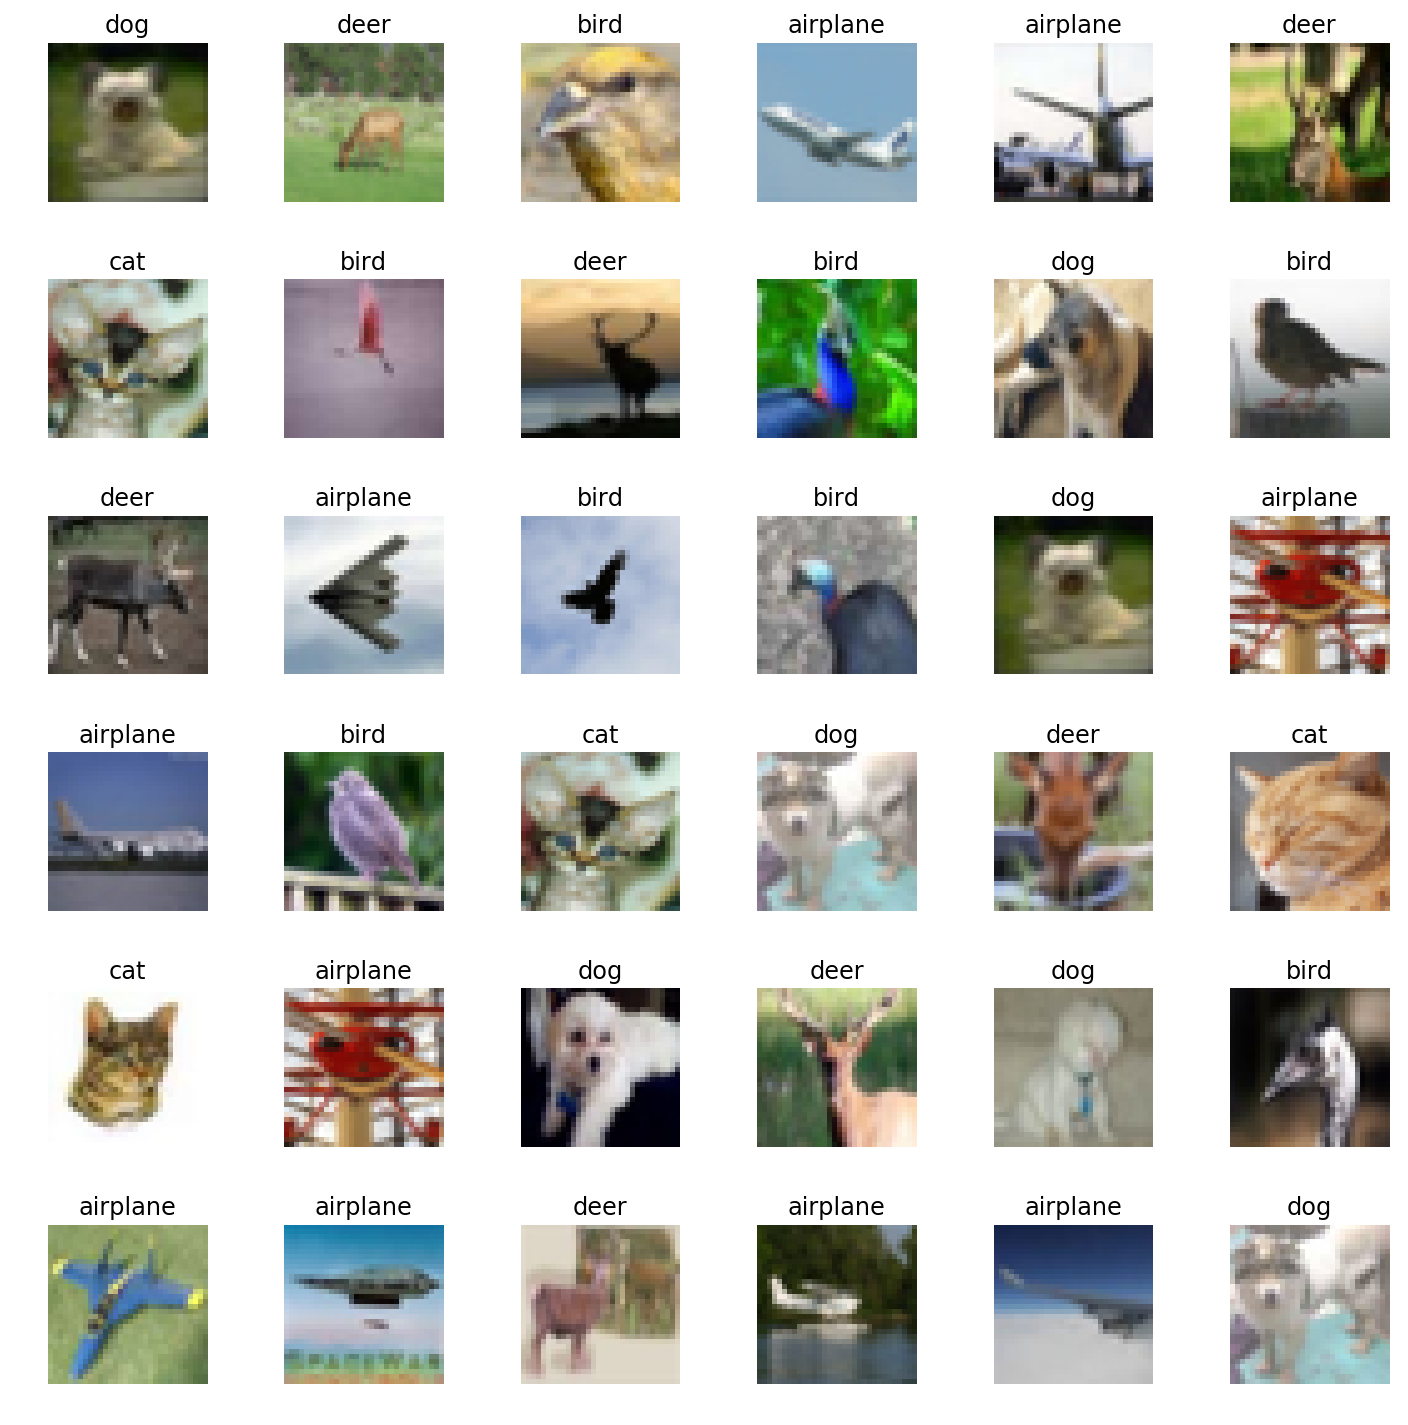

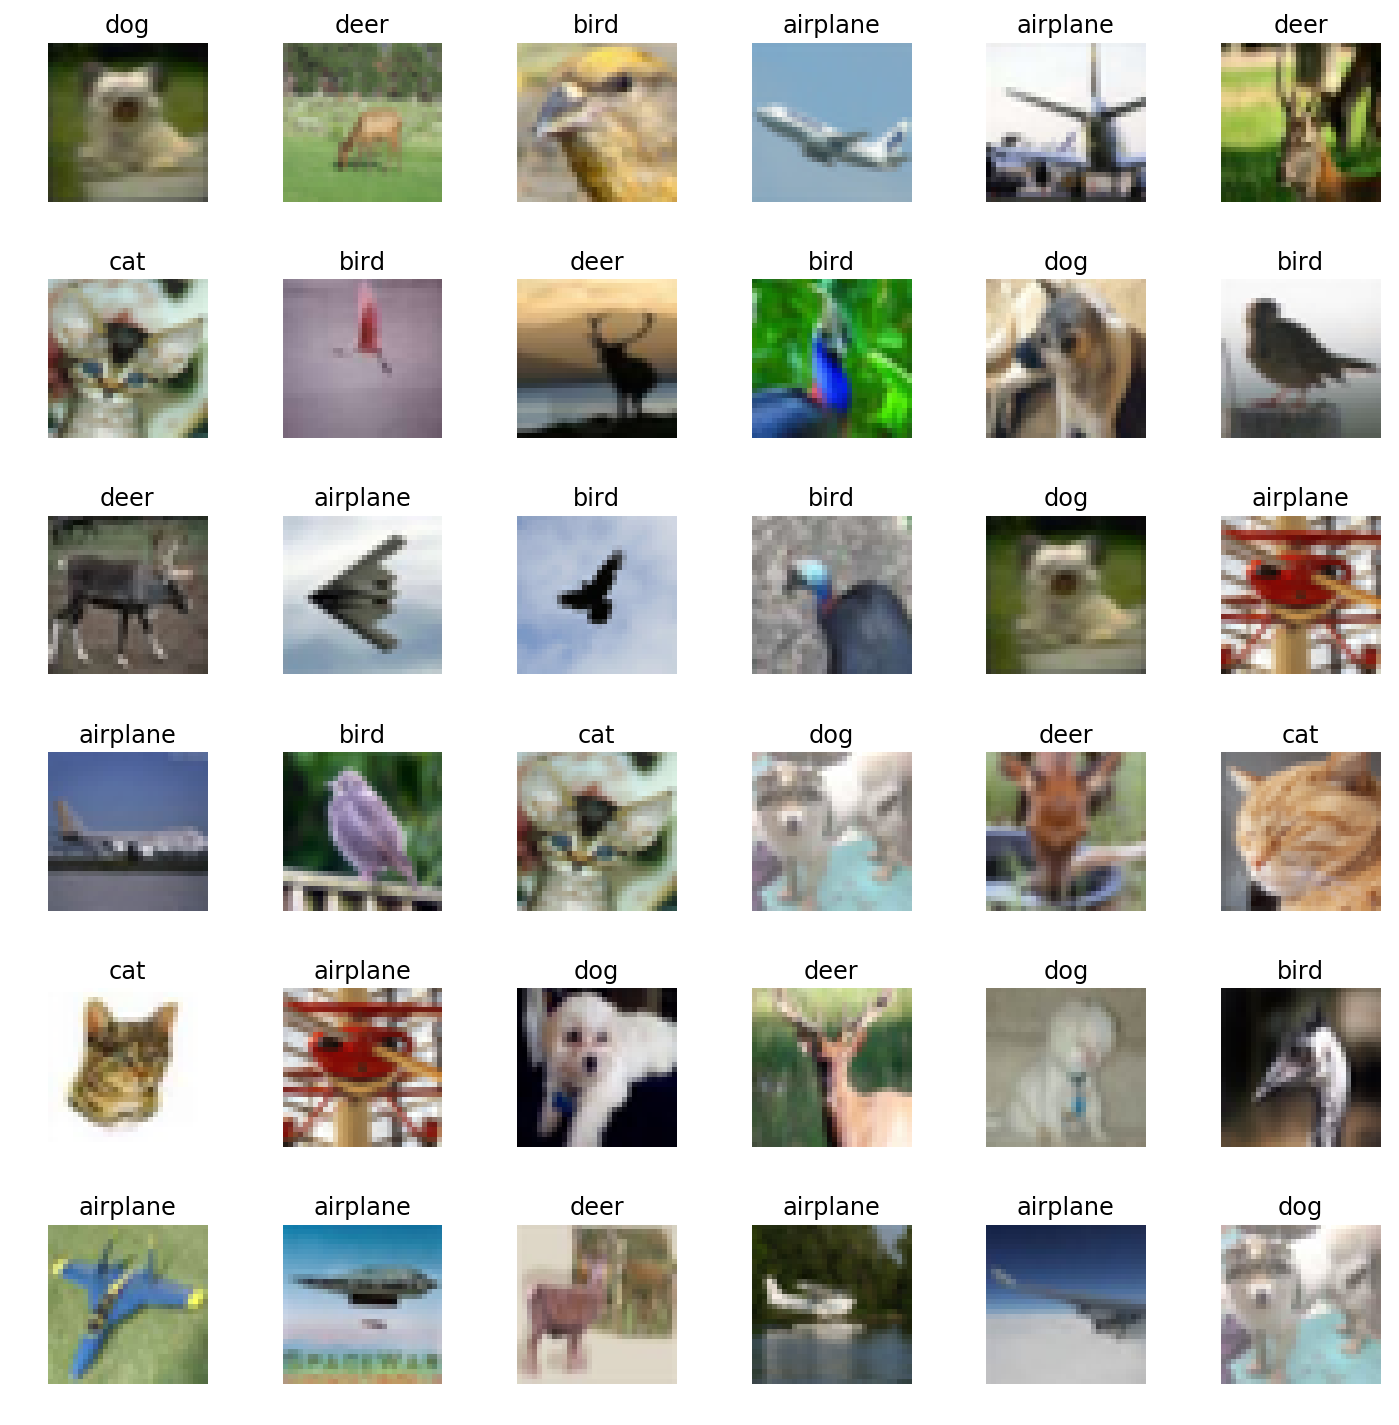

In [117]:
with open("./cifar-10-batches-py/cifar-10-batches-py/batches.meta", 'rb') as fo:
    labels = pickle.load(fo)    
indices = [np.random.choice(range(len(train))) for i in range(36)]
cifar_grid(train,train_labels,indices,6)



### Test Data : 10 images each from 5 classes ( dogs,cats,birds,aeroplane,deer)

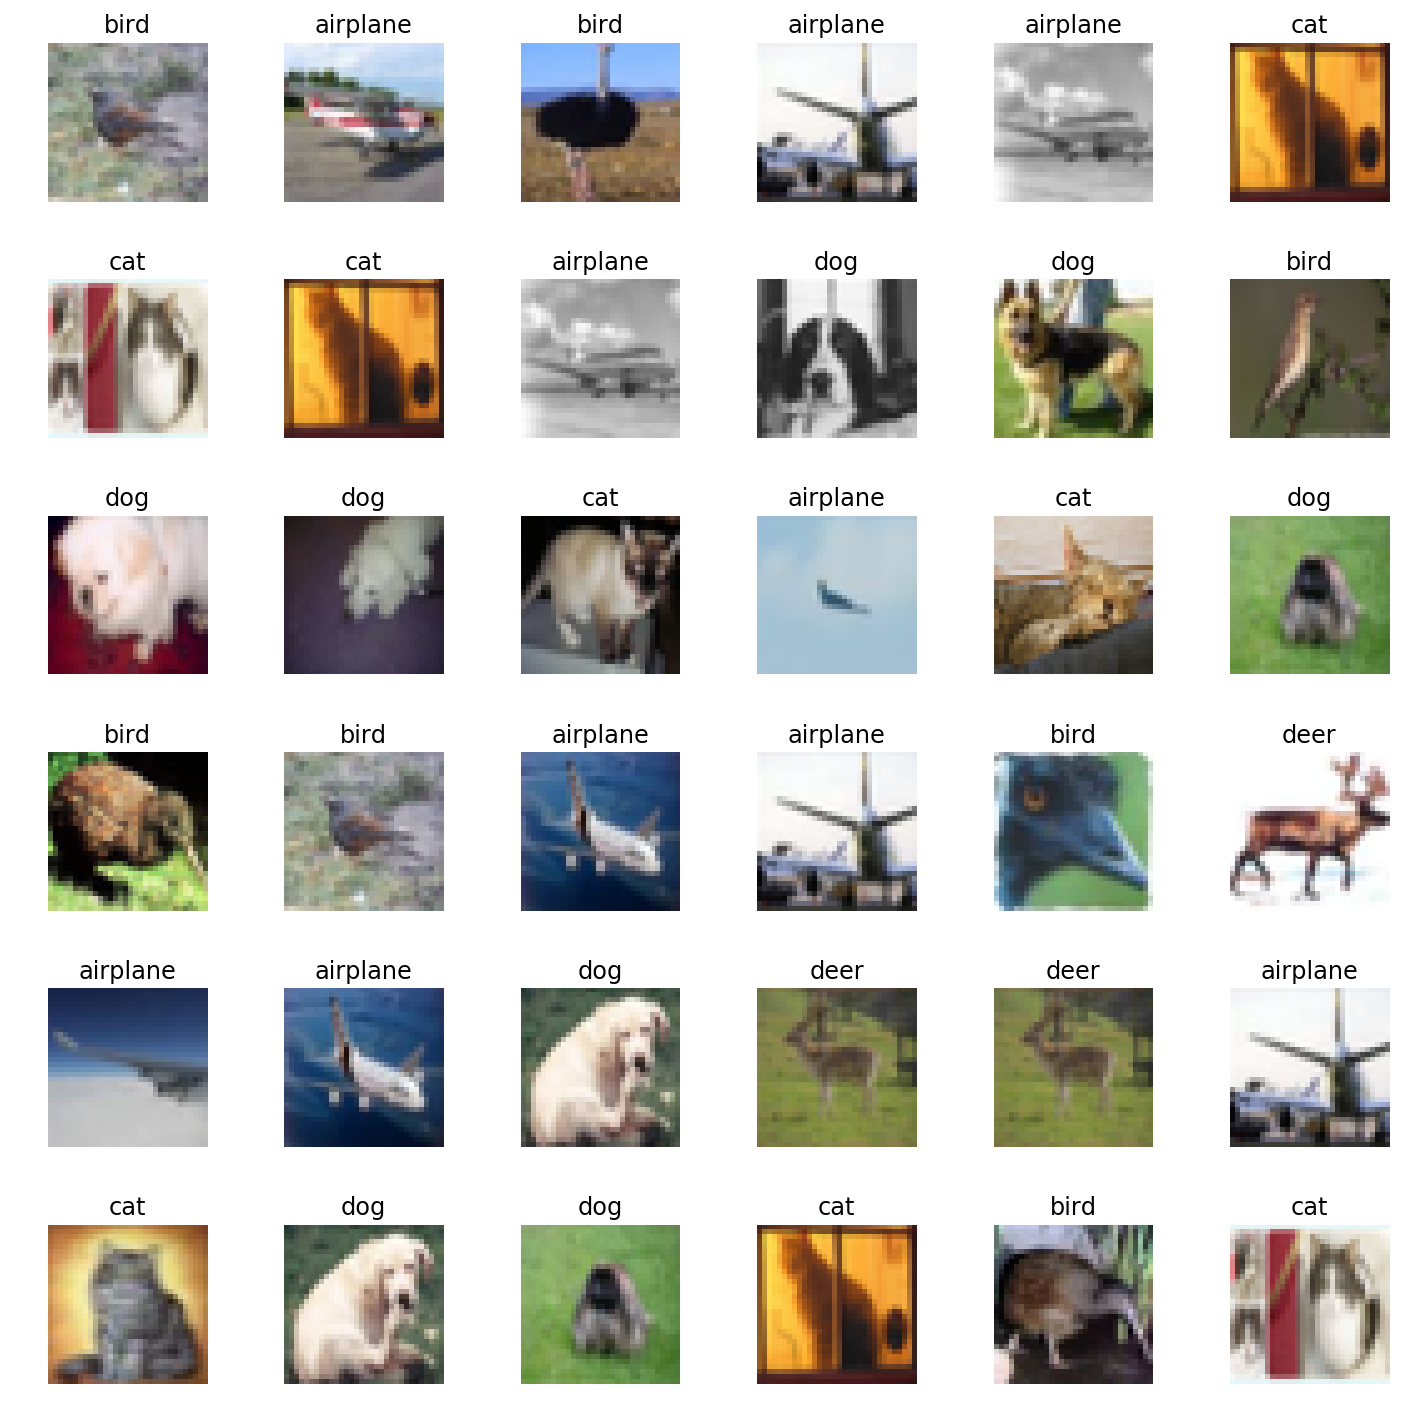

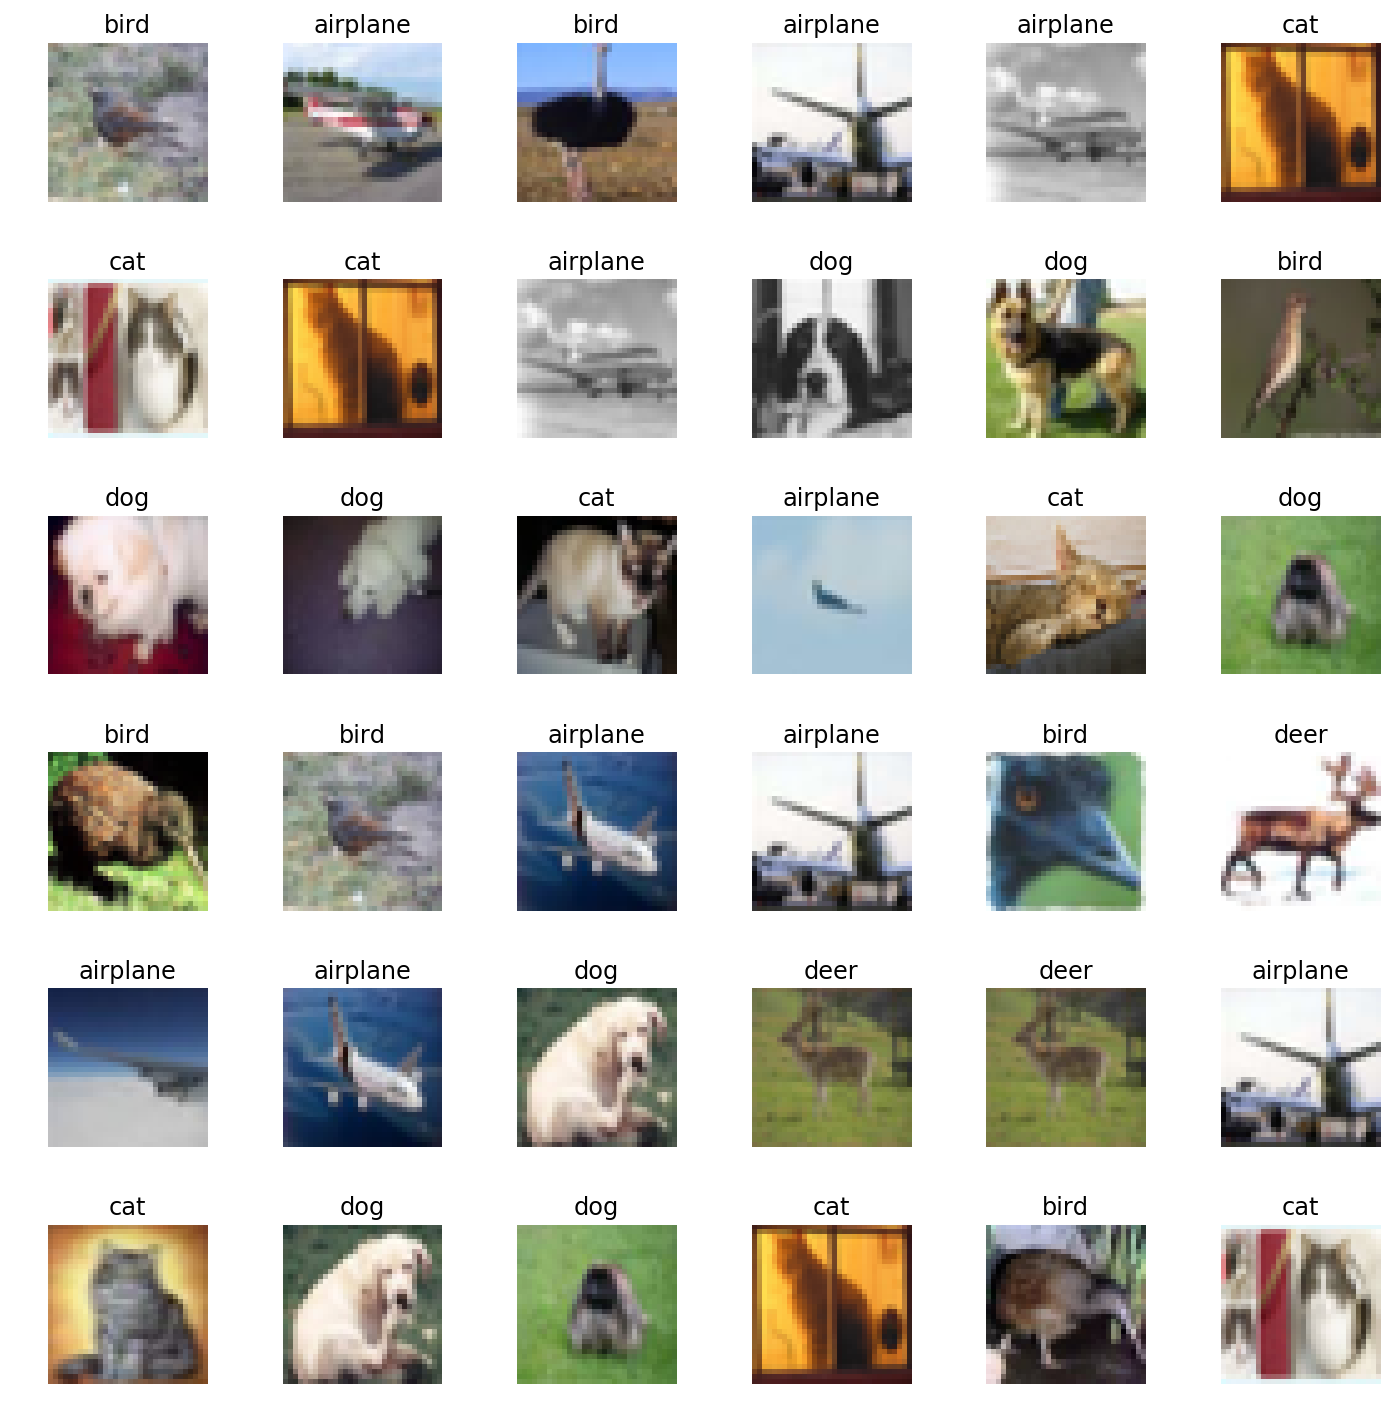

In [118]:
indices = [np.random.choice(range(len(test))) for i in range(36)]
cifar_grid(test,test_labels,indices,6)

In [ ]:
# Prepare Training set
# PICK Up 50 images from each class and prepare the training set of 500 images

In [ ]:
# Prepare Test Set

In [ ]:
# # Real-time data preprocessing
# img_prep = ImagePreprocessing()
# img_prep.add_featurewise_zero_center()
# img_prep.add_featurewise_stdnorm()

# # Real-time data augmentation
# img_aug = ImageAugmentation()
# img_aug.add_random_flip_leftright()
# img_aug.add_random_rotation(max_angle=25.)

# # Convolutional network building
# network = input_data(shape=[None, 32, 32, 3],
#                      data_preprocessing=img_prep,
#                      data_augmentation=img_aug)
# network = conv_2d(network, 32, 3, activation='relu')
# network = max_pool_2d(network, 2)
# network = conv_2d(network, 64, 3, activation='relu')
# network = conv_2d(network, 64, 3, activation='relu')
# network = max_pool_2d(network, 2)
# network = fully_connected(network, 512, activation='relu')
# network = dropout(network, 0.5)
# network = fully_connected(network, 10, activation='softmax')
# network = regression(network, optimizer='adam',
#                      loss='categorical_crossentropy',
#                      learning_rate=0.001)

# # Train using classifier
# model = tflearn.DNN(network, tensorboard_verbose=0)
# model.fit(X, Y, n_epoch=50, shuffle=True, validation_set=(X_test, Y_test),
#           show_metric=True, batch_size=96, run_id='cifar10_cnn')

# def cifar_grid(X,Y,inds,n_col, predictions=None):
#     print "Inds",inds
#     if predictions is not None:
#         if Y.shape != predictions.shape:
#             print("Predictions must equal Y in length!")
#             return(None)
#     N = len(inds)
#     n_row = int(ceil(1.0*N/n_col))
#     fig, axes = plt.subplots(n_row,n_col,figsize=(10,10))

#     clabels = labels["label_names"]
#     print clabels
#     for j in range(n_row):
#         for k in range(n_col):
#             i_inds = j*n_col+k
#             i_data = inds[i_inds]
#             axes[j][k].set_axis_off()
#             if i_inds < N:
#                 axes[j][k].imshow(X[i_data,...], interpolation='nearest')
#                 label = clabels[Y[i_inds]]
# #                 label = clabels[np.argmax(Y[i_data,...])]
#                 print label
#                 axes[j][k].set_title(label)
#                 if predictions is not None:
#                     pred = clabels[np.argmax(predictions[i_data,...])]
#                     if label != pred:
#                         label += " n"
#                         axes[j][k].set_title(pred, color='red')

#     fig.set_tight_layout(True)
#     return(fig)